Hospitales en Cañar
Llega Paciente: Paciente-1 a la hora 0.00.
Llega Paciente: Paciente-2 a la hora 0.00.
Llega Paciente: Paciente-3 a la hora 0.00.
Llega Paciente: Paciente-4 a la hora 0.00.
Llega Paciente: Paciente-5 a la hora 0.00.
Llega Paciente: Paciente-6 a la hora 0.00.
Llega Paciente: Paciente-7 a la hora 0.00.
Llega Paciente: Paciente-8 a la hora 0.00.
Llega Paciente: Paciente-9 a la hora 0.00.
Llega Paciente: Paciente-10 a la hora 0.00.
Llega Paciente: Paciente-11 a la hora 0.00.
Llega Paciente: Paciente-12 a la hora 0.00.
Llega Paciente: Paciente-13 a la hora 0.00.
Llega Paciente: Paciente-14 a la hora 0.00.
Llega Paciente: Paciente-15 a la hora 0.00.
Entra paciente a hospitalizacion: Paciente-1 al dia 0.00.
Entra paciente a hospitalizacion: Paciente-2 al dia 0.00.
Entra paciente a hospitalizacion: Paciente-3 al dia 0.00.
Entra paciente a hospitalizacion: Paciente-4 al dia 0.00.
Entra paciente a hospitalizacion: Paciente-5 al dia 0.00.
Entra paciente a hospitalizacion: Pacie

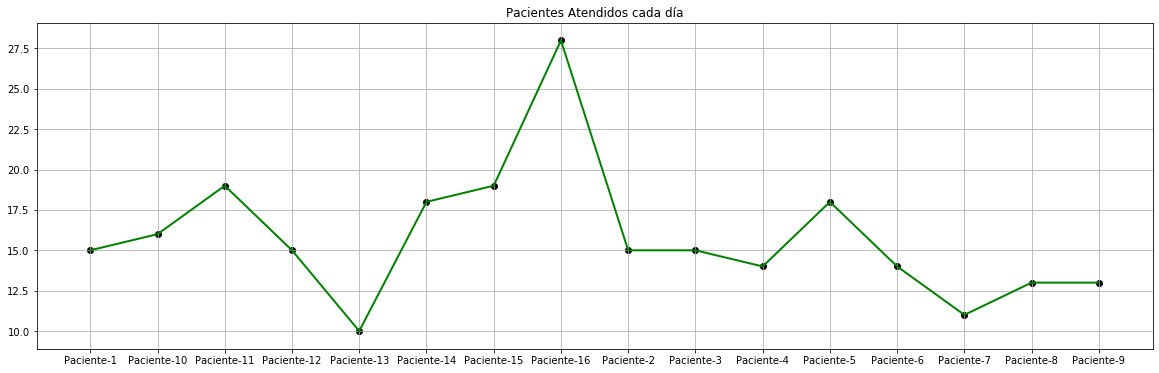

In [55]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

max_pacientes=377
#Total de camas en Cañar
numero_camas=273
#tiempo que tardan los pacientes en reecuperarse (dias) promedio general
tiempo_recuperacion=14
#cantidad de personas que llegan sugun intervalo
intervalo_llega=10
# Tiempo de simulación
tiempo_simulacion = 30

# Diccionario para almacenar los dias en que se recuperan los pacientes
tiempo={}
atendidos=0
inan=0

class Covid(object):
    
    def __init__(self, environment, num_camas, tem_recuperacion):
        self.env=environment
        self.camas = simpy.Resource(environment, num_camas)
        self.tem_recuperacion = tem_recuperacion
        
    def hospitalizacion(self, paciente):
        yield self.env.timeout(random.randint(tiempo_recuperacion-5, tiempo_recuperacion+5))

        print('Recuperacion  {%d%%} salud paciente => %s ' % (random.randint(20,90), paciente))
        
t_e={} 
t_a={}
def llegada_paciente(env, nombre, hospital):
    print('Llega Paciente: %s a la hora %.2f.' % (nombre, env.now))
    with hospital.camas.request() as cama:
        # Ocupamos la cama
        yield cama
        t_e[nombre]=env.now
        # Indicamos que paciente ocupa una cama
        print('Entra paciente a hospitalizacion: %s al dia %.2f.' % (nombre, env.now))
        
        # Procesamos la operacion de hospitalizacion
        yield env.process(hospital.hospitalizacion(nombre))
        t_a[nombre]=abs(t_e[nombre]-env.now)
        # Una vez que termina la llamada con 'yield', se indica el tiempo que se demoro en atender y que se ha recuperado el paciente
        print('Paciente [%s] tiempo de atencion: %.2f.' % (nombre, t_a[nombre]))
        print('Paciente [%s] recuperado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_camas, tem_recuperacion, intervalo):
    hospital=Covid(env, num_camas, tem_recuperacion)
    # Creamos 10 llegadas de pacientes iniciales
    for i in range(15):
        env.process(llegada_paciente(env, 'Paciente-%d'%(i+1),hospital))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se recuperan pacientes generamos mas pacientes
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),hospital))

print('Hospitales en Cañar')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, numero_camas, tiempo_recuperacion, intervalo_llega))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = tiempo_simulacion)


print("Diccionario tiempo :")
print(tiempo)

print('Tiempo de Espera Promedio: ', sum(t_e.values())/len(t_e.values()))

print('Tiempo de Atención Promedio: ', sum(t_a.values())/len(t_a.values()))


# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de pacientes atendidos - valor)
pp.figure(figsize=(20,6))
pp.plot(x,y,linewidth=2,color='green') #Dibujamos las lineas
pp.scatter(x,y,color='black') # Dibujamos los puntos (x,y)
pp.title("Pacientes Atendidos cada día")
pp.grid(True) 
pp.show()